In [1]:
%matplotlib widget
import matplotlib.pylab as plt
import numpy as np
import obspy
from hydrophone_data_processing import load, useful_variables, plotting
import matplotlib.dates as mdates
from obspy.signal.trigger import classic_sta_lta, trigger_onset
from obspy.signal import filter
import pandas as pd
from datetime import datetime, timedelta

from scipy import signal

from kats.consts import TimeSeriesData
import obspy
from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, TrendChangeParameters

In [2]:
day141_paths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=141)
day141 = load.import_corrected_data_for_single_day(day141_paths)


day141_snapshot = day141.slice(starttime=obspy.UTCDateTime('2019-05-21T07:30:00')
                   ,endtime=obspy.UTCDateTime('2019-05-21T08:38:24'))

day141_snapshot.filter(type='highpass', corners=4, zerophase=True, freq=20)

6 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:24.000000Z | 1000.0 Hz, 4104001 samples
7F.A00.02.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:24.000000Z | 1000.0 Hz, 4104001 samples
7F.A00.03.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:24.000000Z | 1000.0 Hz, 4104001 samples
7F.A00.04.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:24.000000Z | 1000.0 Hz, 4104001 samples
7F.A00.05.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:24.000000Z | 1000.0 Hz, 4104001 samples
7F.A00.06.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:24.000000Z | 1000.0 Hz, 4104001 samples

In [3]:
cft = classic_sta_lta(day141_snapshot[2]
                      , nsta=int(1*day141_snapshot[2].stats.sampling_rate)
                      , nlta=int(10*day141_snapshot[2].stats.sampling_rate)
                     )
on_off = trigger_onset(cft, 1.25*2, 1.25)

In [4]:
# on_of[0:5]

In [5]:
# cft.shape

In [6]:
# t[on_of[0:5][:,0]]

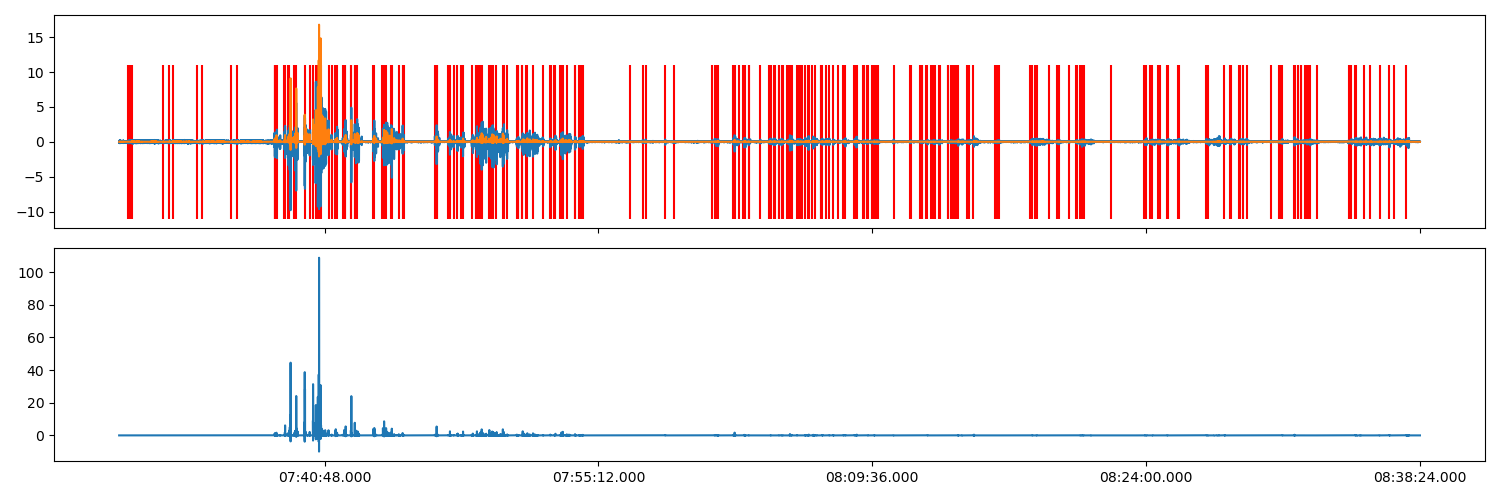

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(15, 5), sharex=True)

t = day141_snapshot[2].times('matplotlib')

ax[0].plot(t, day141_snapshot[2].data)

envelopes = day141_snapshot[2].data**2
envelopes = filter.lowpass(envelopes, freq=20, zerophase=True, corners=4, df=1000)
ax[0].plot(t, envelopes)

ax[1].plot(t, cft*envelopes)

on_t = t[on_off[:,0]]
off_t = t[on_off[:,1]]

ax[0].vlines(on_t, -11, 11, color='red')
# ax[0].vlines(off_t, -11, 11, color='darkorange')

ax[1].xaxis.set_major_formatter(plotting.PrecisionDateFormatter("%H:%M:%S.{ms}"))
fig.tight_layout()

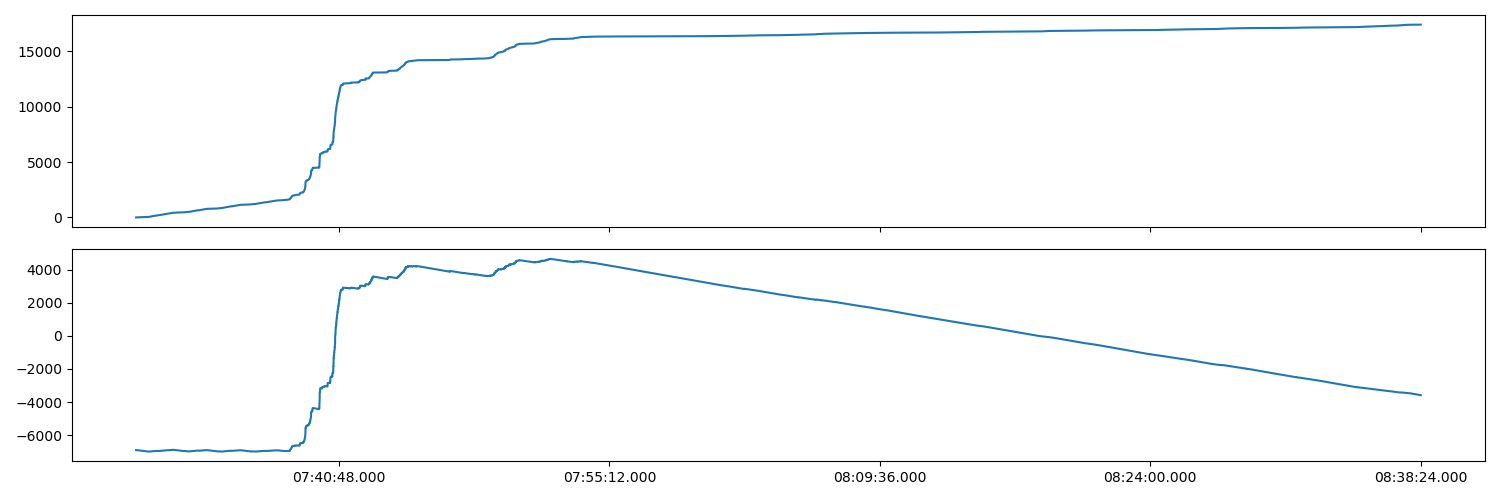

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(15, 5), sharex=True)

t = day141_snapshot[2].times('matplotlib')

data = day141_snapshot[2].data
data = (data**2).cumsum()

ax[0].plot(t, data)

dt_data = signal.detrend(data)
ax[1].plot(t, dt_data)
# envelopes = day141_snapshot[2].data**2
# envelopes = filter.lowpass(envelopes, freq=20, zerophase=True, corners=4, df=1000)
# ax[0].plot(t, envelopes)

# ax[1].plot(t, cft)

# on_t = t[on_off[:,0]]
# off_t = t[on_off[:,1]]

# ax[0].vlines(on_t, -11, 11, color='red')
# # ax[0].vlines(off_t, -11, 11, color='darkorange')

ax[0].xaxis.set_major_formatter(plotting.PrecisionDateFormatter("%H:%M:%S.{ms}"))
fig.tight_layout()

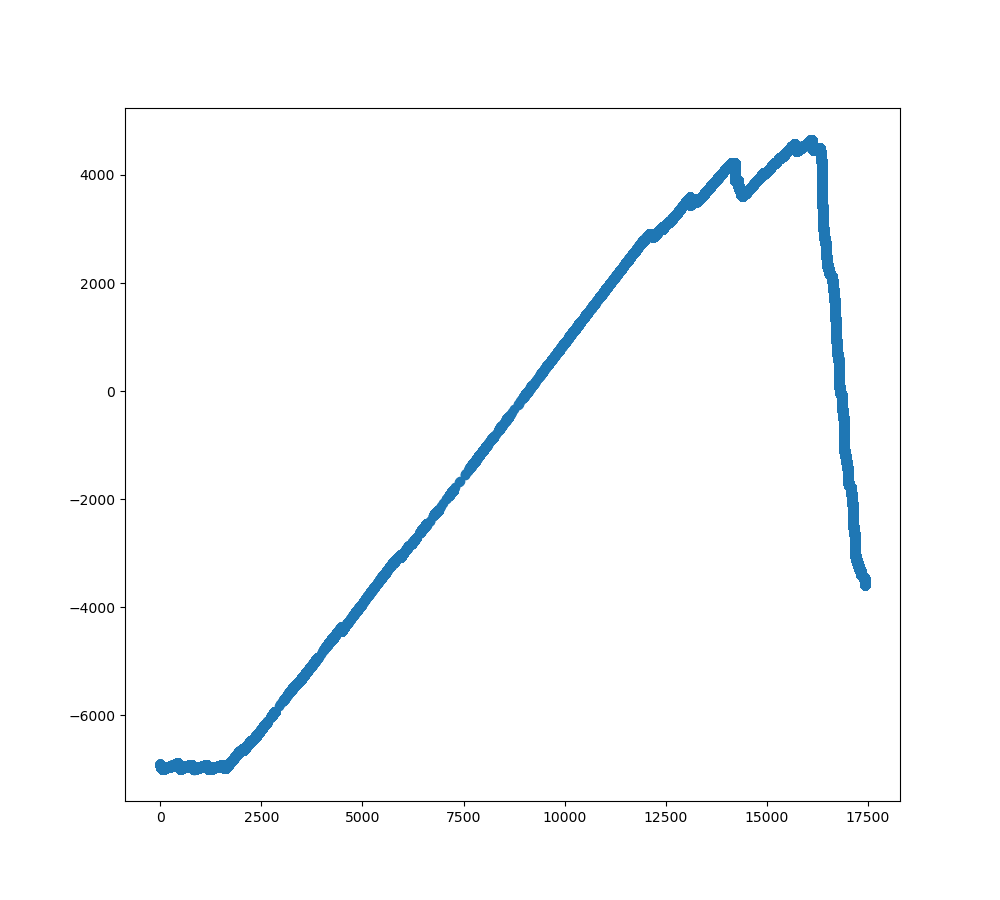

In [9]:
fig, ax = plt.subplots(figsize=(10, 9))

ax.scatter(data, dt_data)

In [10]:
data**2

array([  1.77861494e-07,   1.06778725e-05,   9.16361742e-05, ...,
         3.03561857e+08,   3.03561858e+08,   3.03561866e+08])